In [24]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [62]:
#above 2000 average with respect to 20-year
df = pd.read_csv("raw/sea_levels_2015.csv")
df['Year'] = [str(y).split('.')[0]for y in df['Year']]
df = df[['Year','1','2']]
df['3'] = -38.59
df['diff'] = df['1']- df['3']
df.head()

,Year,1,2,3,diff
0,1993,-38.59,89.86,-38.59,0.00
1,1993,-41.97,90.86,-38.59,-3.38
2,1993,-41.93,87.27,-38.59,-3.34
3,1993,-42.67,90.75,-38.59,-4.08
4,1993,-37.86,90.26,-38.59,0.73


In [71]:
dfs=[]
for y in df['Year'].unique():
    dfs.append(df[df['Year']==y].iloc[[len(df[df['Year']==y])-1]])
dfs.append(df[df['Year']=='1993'].iloc[[0]])
final_df = pd.concat(dfs)
final_df.reset_index(inplace=True,drop=True)
final_df["Year"].iloc[-1] = '1992'

In [78]:
final_df = final_df.sort_values('Year').reset_index(drop=True)
final_df['Year'] = [dt.date(int(y),1,1) for y in final_df['Year']]

<AxesSubplot:xlabel='Year'>

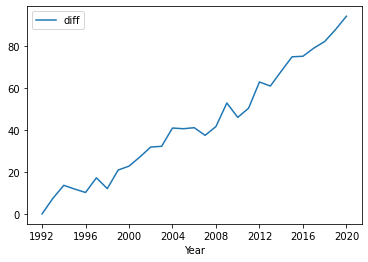

In [83]:
final_df.to_csv('cleaned/sea_level_global.csv',index=False)
final_df.plot('Year','diff')

datetime.date(1992, 1, 1)